In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import helpers

plt.rcParams['figure.figsize'] = (16, 10)

In [87]:
data = helpers.load_data('../vertex_finding/data/train/RapidVPData_6915602_43502.json')
df = helpers.extract_tracks(data)
mc = helpers.extract_mc(data)
zs = df['z'].values.reshape(-1, 1)

In [88]:
counts, centers, widths = helpers.make_histogram(zs)

In [89]:
peak_counts, peak_centers, _ = helpers.make_histogram(zs, bins=np.arange(-120, 120, 4))
peaks = helpers.find_peaks(peak_counts, peak_centers, height=5)

In [90]:
clusters = helpers.find_clusters(zs, eps=2.9625)

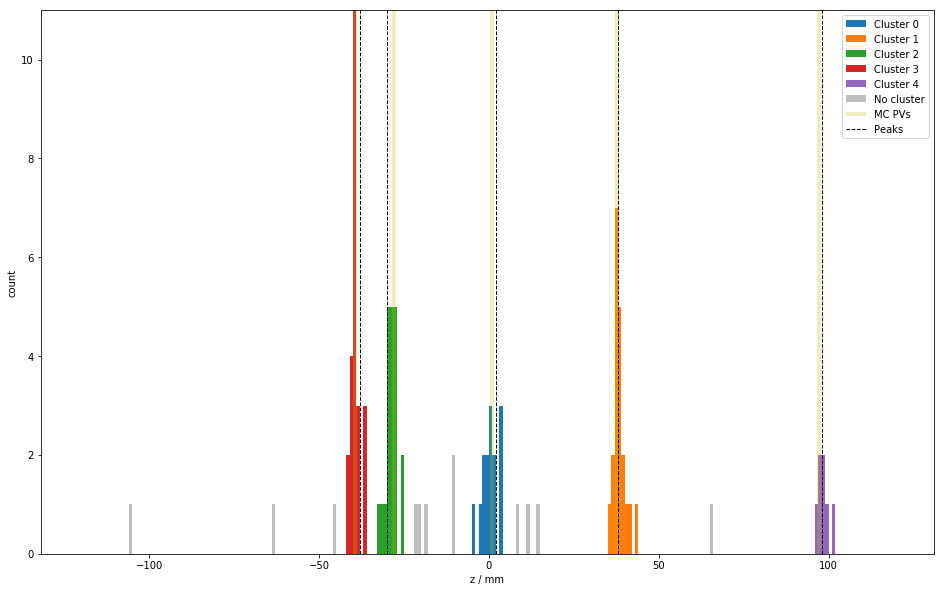

In [91]:
m = max(counts)

plt.vlines(mc.z[mc.products > 5], 0, m, color='y', linewidth=4, alpha=0.25, label='MC PVs')
plt.vlines(peaks, 0, m, color='k', linewidth=1, linestyle='dashed', label='Peaks')

for l in np.unique(clusters[clusters != -1]):
    plt.hist(zs[clusters == l], bins=np.arange(-120, 120, 1), label=f'Cluster {l}')
plt.hist(zs[clusters == -1], bins=np.arange(-120, 120, 1), color='k', alpha=0.25, label='No cluster')
plt.legend(loc='best')
plt.xlabel('z / mm')
plt.ylabel('count')
_ = plt.ylim(0, m)

Values for eps and height, as well as binning used for peak finding are the result of a discussion with Niklas.